### SharePoint 직접 다운로드 링크 생성
링크의 구조를 살펴보고 이를 직접 다운로드 링크로 변환해 봅니다. 다음과 같이 링크의 일부를 변경합니다:

In [1]:
!wget "https://visionhoseo-my.sharepoint.com/personal/20191432_365_hoseo_edu/_layouts/15/download.aspx?share=EWuy2edQ-8pNgI__vOQiHiwBlzDziZdEs9kK_7dXPgozuw" -O onedive_data.zip

--2024-09-06 09:59:22--  https://visionhoseo-my.sharepoint.com/personal/20191432_365_hoseo_edu/_layouts/15/download.aspx?share=EWuy2edQ-8pNgI__vOQiHiwBlzDziZdEs9kK_7dXPgozuw
Resolving visionhoseo-my.sharepoint.com (visionhoseo-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2603:1061:13f2:2419::365:590, ...
Connecting to visionhoseo-my.sharepoint.com (visionhoseo-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3234970026 (3.0G) [application/x-zip-compressed]
Saving to: ‘onedive_data.zip’

onedive_data.zip    100%[===================>]   3.01G  50.0MB/s    in 65s     

2024-09-06 10:00:28 (47.6 MB/s) - ‘onedive_data.zip’ saved [3234970026/3234970026]



In [2]:
!unzip -qq ./onedive_data.zip

Train/Condition_Drop_train/잿빛곰팡이병/1180435_20211220_1_1_a1_1_2_13_3_200.jpg:  mismatching "local" filename (Train/Condition_Drop_train/ьЮ┐ы╣Ыъ│░эМбьЭ┤ы│С/1180435_20211220_1_1_a1_1_2_13_3_200.jpg),
         continuing with "central" filename version
replace Train/Condition_Drop_train/잿빛곰팡이병/1180435_20211220_1_1_a1_1_2_13_3_200.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Train/Condition_Drop_train/잿빛곰팡이병/1180485_20211220_1_1_a1_1_2_13_3_250.jpg:  mismatching "local" filename (Train/Condition_Drop_train/ьЮ┐ы╣Ыъ│░эМбьЭ┤ы│С/1180485_20211220_1_1_a1_1_2_13_3_250.jpg),
         continuing with "central" filename version
Train/Condition_Drop_train/잿빛곰팡이병/1180645_20211220_1_1_a1_1_2_13_3_112.jpg:  mismatching "local" filename (Train/Condition_Drop_train/ьЮ┐ы╣Ыъ│░эМбьЭ┤ы│С/1180645_20211220_1_1_a1_1_2_13_3_112.jpg),
         continuing with "central" filename version
Train/Condition_Drop_train/잿빛곰팡이병/1180695_20211220_1_1_a1_1_2_13_3_162.jpg:  mismatching "local" filename (Train/Condition_Drop_trai

In [3]:
# /content/Train/Condition_Drop_train/잿빛곰팡이병/1180435_20211220_1_1_a1_1_2_13_3_200.jpg
# /content/Train/Label_train/Condition_Drop/잿빛곰팡이병/1180435_20211220_1_1_a1_1_2_13_3_200.json

In [4]:
import os
import json

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [5]:
img_ex_path = "/content/Train/Condition_Drop_train/잿빛곰팡이병/1180485_20211220_1_1_a1_1_2_13_3_250.jpg"
json_ex_path = "/content/Train/Label_train/Condition_Drop/잿빛곰팡이병/1180485_20211220_1_1_a1_1_2_13_3_250.json"

with open (json_ex_path, "r") as f:
    json_ex = json.load(f)

In [6]:
json_ex

{'description': {'date': '20211220',
  'image': '1180485_20211220_1_1_a1_1_2_13_3_250.jpg',
  'task': 1,
  'width': 3024,
  'time': '1005',
  'region': 0,
  'height': 3024},
 'annotations': {'area': 1,
  'disease': 'a1',
  'grow': 13,
  'bbox': [{'x': 880.8788452148438,
    'h': 1586.2568359375,
    'y': 725.628173828125,
    'w': 1299.380615234375}],
  'part': [{'x': 1019.2544555664062,
    'h': 985.5042724609375,
    'y': 732.378173828125,
    'id': 0,
    'w': 1157.630126953125}],
  'risk': 3,
  'crop': 1}}

In [7]:
json_ex['annotations']['bbox'][0]

{'x': 880.8788452148438,
 'h': 1586.2568359375,
 'y': 725.628173828125,
 'w': 1299.380615234375}

In [8]:
anno_list = []

for key, value in json_ex['annotations']['bbox'][0].items():
  anno_list.append(int(value))

print(anno_list)

[880, 1586, 725, 1299]


In [9]:
json_ex['annotations']['bbox']

[{'x': 880.8788452148438,
  'h': 1586.2568359375,
  'y': 725.628173828125,
  'w': 1299.380615234375}]

In [10]:
json_ex['annotations']['part']

[{'x': 1019.2544555664062,
  'h': 985.5042724609375,
  'y': 732.378173828125,
  'id': 0,
  'w': 1157.630126953125}]

In [11]:
part_dict = json_ex['annotations']['part'][0]
x = part_dict['x']
h = part_dict['h']
y = part_dict['y']
w = part_dict['w']

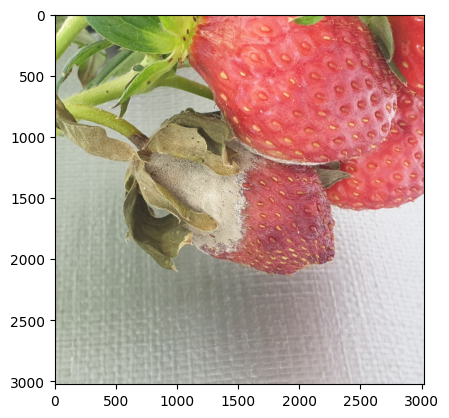

In [12]:
img = Image.open(img_ex_path).convert('RGB')
draw_img = img
plt.imshow(img)

## PIL (piilow)
ImageDraw.rectangle(xy, fill=None, outline=None, width=1)

Parameters:
xy – Two points to define the bounding box. Sequence of either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1]

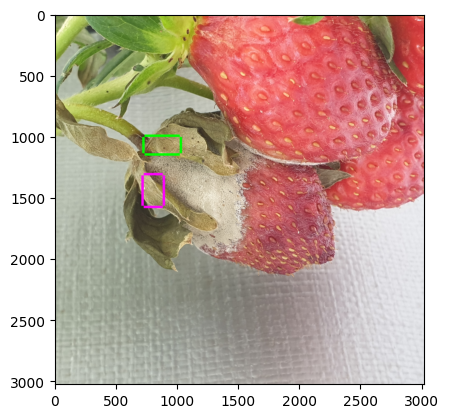

In [13]:
draw = ImageDraw.Draw(draw_img)
draw.rectangle([x,h,y,w], outline=(0,255,0), width = 20)
draw.rectangle(anno_list, outline=(255,0,255), width = 20)
plt.imshow(draw_img)

In [14]:
json_dir_path = "/content/Train/Label_train/Condition_Drop/잿빛곰팡이병/"

cnt = 0
for i in os.listdir(json_dir_path):
  print(i)
  with open (json_dir_path+i, "r") as f:
    json_i = json.load(f)
    print(json_i['description']['width'])


1224134_20211230_1_1_a1_1_2_13_3_252.json
3024
1216325_20211228_1_1_a1_1_2_13_3_129.json
3024
1205566_20211224_1_1_a1_1_2_13_3_197.json
3024
1223227_20211230_1_1_a1_1_2_13_3_169.json
2160
1189444_20211222_1_1_a1_1_2_13_1_41.json
3492
1187212_20211222_1_1_a1_1_2_13_3_197.json
3024
1224384_20211230_1_1_a1_1_2_13_3_502.json
3024
1221830_20211229_1_1_a1_1_2_13_3_224.json
2160
1203616_20211224_1_1_a1_1_2_13_2_6.json
2160
1212994_20211228_1_1_a1_1_2_13_3_103.json
3024
1203366_20211224_1_1_a1_1_2_13_3_182.json
3024
1220780_20211229_1_1_a1_1_2_13_3_572.json
3024
1216776_20211228_1_1_a1_1_2_13_2_16.json
3024
1193794_20211223_1_1_a1_1_2_13_3_290.json
3024
1193044_20211223_1_1_a1_1_2_13_3_40.json
3492
1221730_20211229_1_1_a1_1_2_13_3_124.json
2160
1204666_20211224_1_1_a1_1_2_13_3_97.json
3024
1194244_20211223_1_1_a1_1_2_13_3_113.json
2160
1190082_20211222_1_1_a1_1_2_13_3_241.json
3024
1202398_20211224_1_1_a1_1_2_13_3_228.json
3492
1214344_20211228_1_1_a1_1_2_13_2_105.json
2160
1221580_20211229_1_

In [ ]:
json_dir_path = "/content/Train/Label_train/Condition_Drop/잿빛곰팡이병/"
img_dir_path = "/content/Train/Condition_Drop_train/잿빛곰팡이병/"


for i in os.listdir(json_dir_path):
  # json label
  bbox_list = []
  part_list = []
  with open (json_dir_path+i, "r") as f:
    json_i = json.load(f)
    print(json_i['description']['width'])
    print(json_i['description']['height'])
    bbox_list = json_i['annotations']['bbox'][0]
    bbox_x = bbox_list['x']
    bbox_h = bbox_list['h']
    bbox_y = bbox_list['y']
    bbox_w = bbox_list['w']
    bbox = bbox_x, bbox_h, bbox_y, bbox_w
    print(bbox)
    part_list = json_i['annotations']['part'][0]
  # image
  file_name = os.path.splitext(i)
  img_path = img_dir_path + file_name[0] + '.jpg'
  print(img_path)
  img = Image.open(img_path).convert('RGB')
  draw = ImageDraw.Draw(img)
  draw.rectangle(bbox, outline=(0,255,0), width = 20)
  #draw.rectangle(part_list, outline=(255,0,255), width = 20)
  display(img)